In [27]:
import pandas as pd
import seaborn as sns
import json

import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
with open("topo_base_stats.json", "r") as fh:
    data_dict = json.load(fh)
    

In [15]:
dfs = []
for t in data_dict.keys():
    df = pd.DataFrame(data_dict[t])
    dfs.append(df)

In [16]:
df3 = pd.concat(dfs, axis=0)
df3.to_csv("topo_stats.csv")

In [17]:
df = pd.read_csv("topo_stats.csv", index_col=0)
df.sample(3)

,zone,med,stdev,mean
1,dem_5m_pzone_2_cog,52.313725,18.597059,51.142212
19,dem_5m_pzone_20_cog,67.615524,17.562824,66.130417
10,tri_5m_pzone_11_cog,0.117904,0.207094,0.188934


In [24]:
def extract_2(s):
    s1 = s.split('_')
    return pd.Series([s1[0], int(s1[3]) ])

df[['topo_type', 'pzone']] = df['zone'].apply(extract_2)
df.sample(3)

,zone,med,stdev,mean,topo_type,pzone
17,tri_5m_pzone_18_cog,0.076305,0.149170,0.121730,tri,18
21,dem_5m_pzone_22_cog,47.316772,11.123861,48.078362,dem,22
1,slope_5m_pzone_2_cog,0.669523,2.684610,1.330587,slope,2


In [26]:
df.to_csv("topo_stats.csv")

In [35]:
stats = gpd.read_file('R:/kmoch/grid_tiles/DEM_1m_processing_zones.shp').to_crs(3301)
stats['id'] = pd.to_numeric(stats['id'], downcast='integer')

stats = stats.set_index('id')
stats

,left,right,bottom,top,geometry
id,,,,,
1,365000,415000,6385000,6485000,"POLYGON ((415000.000 6435000.000, 415000.000 6..."
2,615000,715000,6585000,6635000,"POLYGON ((615000.000 6635000.000, 665000.000 6..."
3,665000,765000,6335000,6435000,"POLYGON ((715000.000 6385000.000, 715000.000 6..."
4,515000,565000,6385000,6485000,"POLYGON ((565000.000 6435000.000, 565000.000 6..."
5,715000,765000,6535000,6635000,"POLYGON ((765000.000 6585000.000, 765000.000 6..."
6,365000,465000,6485000,6535000,"POLYGON ((415000.000 6535000.000, 465000.000 6..."
7,465000,615000,6585000,6635000,"POLYGON ((465000.000 6635000.000, 515000.000 6..."
8,665000,765000,6435000,6535000,"POLYGON ((715000.000 6485000.000, 765000.000 6..."
9,415000,515000,6385000,6485000,"POLYGON ((515000.000 6435000.000, 515000.000 6..."


In [74]:
for top in ['dem', 'slope', 'tri']:
    for typ in ['med','stdev','mean']:
        nam = f"{top}_{typ}"
        stats[nam] = np.nan


In [75]:
subg.loc[subg['pzone'] ==3][typ].values[0]

0.2072514444589615

In [76]:
for idx, row in stats.iterrows():
    for top in ['dem', 'slope', 'tri']:
        for typ in ['med','stdev','mean']:
            try:
                nam = f"{top}_{typ}"
                subg = df.loc[df['topo_type'] == top][[typ, 'pzone']]
                val = subg.loc[subg['pzone'] == idx][typ].values[0]
                # print(f"col: {nam} | stats idx: {idx} | extract val: {val}")
                # print(type(val))
                stats.loc[idx, nam] = val
            except:
                pass

stats

,left,right,bottom,top,geometry,dem_med,dem_stdev,dem_mean,slope_med,slope_stdev,slope_mean,tri_med,tri_stdev,tri_mean,cent,cent_x,cent_y
id,,,,,,,,,,,,,,,,,
1,365000,415000,6385000,6485000,"POLYGON ((415000.000 6435000.000, 415000.000 6...",12.804450,11.883759,15.243779,0.610438,1.404938,1.008904,0.056749,0.108238,0.087211,POINT (390000.000 6435000.000),390000.000000,6.435000e+06
2,615000,715000,6585000,6635000,"POLYGON ((615000.000 6635000.000, 665000.000 6...",52.313725,18.597059,51.142212,0.669523,2.684610,1.330587,0.057533,0.220195,0.110431,POINT (665000.000 6610000.000),665000.000000,6.610000e+06
3,665000,765000,6335000,6435000,"POLYGON ((715000.000 6385000.000, 715000.000 6...",95.449326,54.917946,114.591019,1.527759,3.607318,2.881607,0.119808,0.256469,0.207251,POINT (706666.667 6393333.333),706666.666667,6.393333e+06
4,515000,565000,6385000,6485000,"POLYGON ((565000.000 6435000.000, 565000.000 6...",21.377699,18.334520,27.070177,0.507286,1.476215,0.935032,0.050929,0.124799,0.088644,POINT (540000.000 6435000.000),540000.000000,6.435000e+06
5,715000,765000,6535000,6635000,"POLYGON ((765000.000 6585000.000, 765000.000 6...",29.780624,10.226061,28.033569,0.581072,3.912673,1.763510,0.056228,0.294703,0.145972,POINT (740000.000 6585000.000),740000.000000,6.585000e+06
6,365000,465000,6485000,6535000,"POLYGON ((415000.000 6535000.000, 465000.000 6...",9.433425,7.077472,10.281200,0.611336,1.366373,1.019015,0.060224,0.104435,0.090280,POINT (415000.000 6510000.000),415000.000000,6.510000e+06
7,465000,615000,6585000,6635000,"POLYGON ((465000.000 6635000.000, 515000.000 6...",36.873051,23.458357,37.112724,0.824953,2.737288,1.581295,0.071891,0.204908,0.128202,POINT (540000.000 6610000.000),540000.000000,6.610000e+06
8,665000,765000,6435000,6535000,"POLYGON ((715000.000 6485000.000, 765000.000 6...",45.675247,18.831594,50.083996,0.749791,2.120223,1.387898,0.066825,0.148570,0.110549,POINT (706666.667 6476666.667),706666.666667,6.476667e+06
9,415000,515000,6385000,6485000,"POLYGON ((515000.000 6435000.000, 515000.000 6...",13.757725,8.395666,13.806698,0.557247,1.227097,0.920201,0.052124,0.100997,0.081558,POINT (465000.000 6435000.000),465000.000000,6.435000e+06


In [77]:
stats.dtypes

left              int64
right             int64
bottom            int64
top               int64
geometry       geometry
dem_med         float64
dem_stdev       float64
dem_mean        float64
slope_med       float64
slope_stdev     float64
slope_mean      float64
tri_med         float64
tri_stdev       float64
tri_mean        float64
cent           geometry
cent_x          float64
cent_y          float64
dtype: object

In [78]:
eesti = gpd.read_file('R:/kmoch/grid_tiles/estonia_without_lakes.shp').to_crs(3301)

stats['cent'] = stats.centroid
stats['cent_x'] = stats.apply(lambda g: g['cent'].x, axis=1)
stats['cent_y'] = stats.apply(lambda g: g['cent'].y, axis=1)

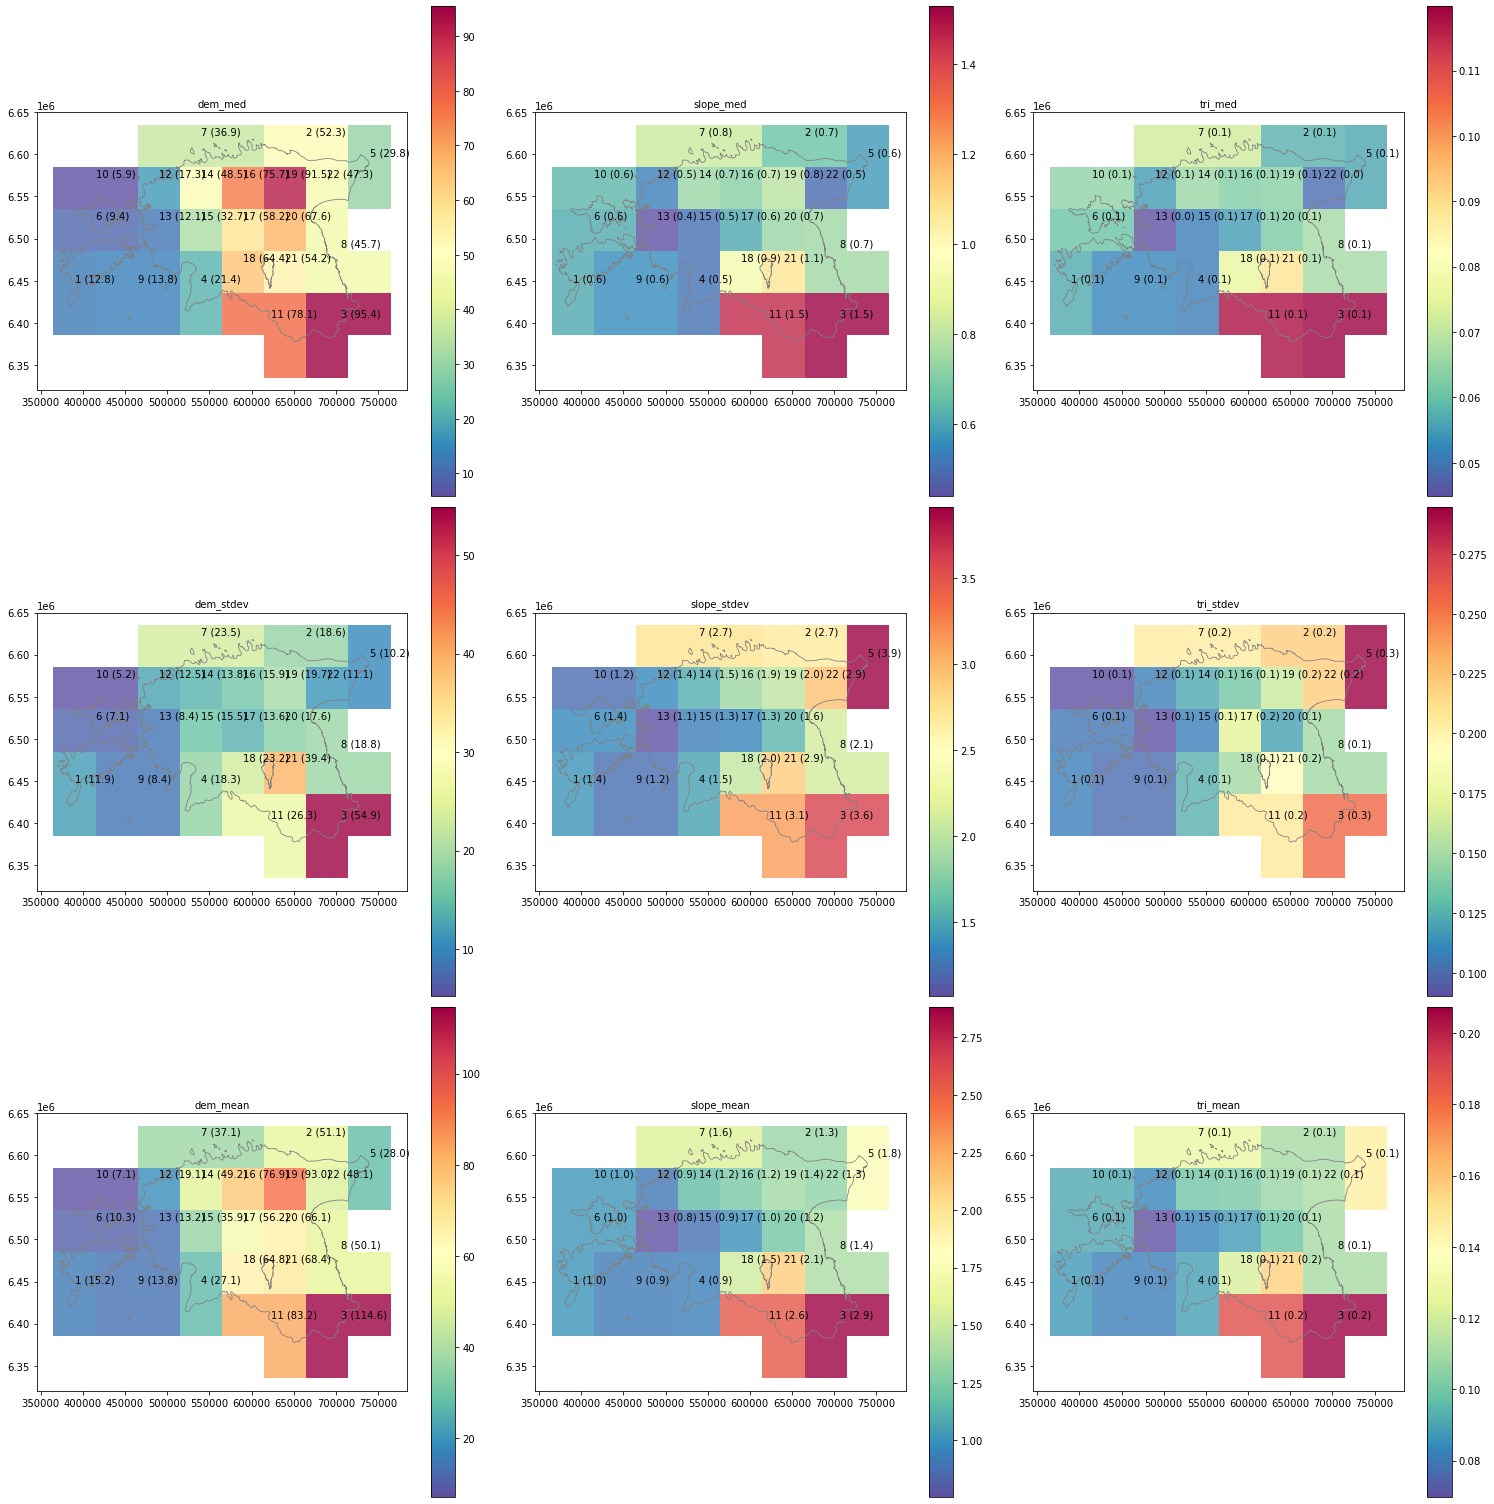

In [79]:
nrow = 0
ncol = 0

max_rows = 3
max_cols = 3

j = 0

fig, axs = plt.subplots(max_rows, max_cols, figsize=(21,21))

for top in ['dem', 'slope', 'tri']:
    for typ in ['med','stdev','mean']:
        x = f"{top}_{typ}"
        if j % max_rows == 0 and nrow > 0:
            ncol = ncol + 1

        nrow = j % max_rows
    
        # print(f"idx ({j}) row col ({ncol} / {nrow})")
        
        eesti.boundary.plot(edgecolor='grey', lw=0.8, ax=axs[nrow][ncol])
        stats.plot(column=x, legend=True, ax=axs[nrow][ncol], alpha=0.8, cmap='Spectral_r')
        # vmin=10, vmax=250
        
        for idx, row in stats.iterrows():
            t_val = row[x]
            if not np.isnan(t_val):
                axs[nrow][ncol].text(row['cent_x'], row['cent_y'],"{} ({:.1f})\n".format(idx,t_val),size=10, color='black')

        ax=axs[nrow][ncol].set_title(f"{x}", fontsize=10)
        
        j=j+1

plt.savefig("topo_base_stats_overview1.png", facecolor='white', transparent=False)
plt.tight_layout()